# **Image Prompt & Grid Size**

In [9]:
gird_dim = 4
prompts = [
    # "A cat sitting next to a bus.",
    # "A dog chasing a butterfly in a meadow.",
    # "A child holding a red balloon in a park.",
    # "A chef preparing sushi in a kitchen.",
    # "A bird perched on a windowsill with a view of the city skyline.",
    # "A woman reading a book under a large oak tree.",
    # "A black dog sitting beside 2 zebras, both looking in different directions.",
    # "A robot serving coffee in a cozy café.",
    # "A man playing the violin on a quiet beach at sunset.",
    # "A pair of glasses resting on a stack of books.",
    # "A horse grazing in a field with a mountain in the background.",
    # "A giraffe drinking water next to a small pond.",
    # "A boat floating on a calm lake with a forest in the distance.",
    # "A bicycle leaning against a lamppost in a quiet street.",
    # "A painter working on a canvas with a cityscape in the background.",
    # "A picnic setup with a basket, blanket, and fruit on a sunny day.",
    # "A skateboard leaning against a graffiti-covered wall.",
    # "A piano in a large, empty concert hall.",
    # "A lighthouse standing tall on a rocky cliff by the ocean.",
    # "A telescope pointing towards the night sky filled with stars.",
    # 'there are a robot made of gold and a robot made of silver are standing on an exotic planet with a red butterfly flying around them.',
    #  "A red car passing by a fire hydrant on the sidewalk.",
    #  "A painting of a couple holding a yellow umbrella in a street on a rainy night. The woman is wearing a white dress and the man is wearing a blue suit.",
    # "An old time car is parked at the curb near a stop sign.",
    #  "A mirror, a white sink and a vase with red flowers in a bathroom with an artificial light.",
    #  "A black cow standing next to a 2 red damaged cars on a dirty lot.",
    # "A red car on a steep mountain road with pine trees and a clear sky.",
    # "A delivery truck and a mailbox positioned side by side on a quiet suburban street."

    ## Prompts for Testing Object and Prompt Generator, Color and Quantity
    # "A cow standing next to many damaged cars on a dirty lot.",
    # "Two black cows standing next to a many damaged cars on a dirty lot.",
    # "2 black cows standing next to a many damaged cars on a dirty lot.",
    # "Ten cows standing next to a many damaged blue cars on a dirty lot.",
    "A black cow standing next to 2 damaged red cars on a dirty lot.",

]

# Prompt for Image Generation
recusive_diff_prompt = prompts[0]

def print_time_taken(start_time, end_time,process):
    print(f"Time taken for {process}: {int((end_time - start_time) // 60)} minutes and {((end_time - start_time) % 60):.0f} seconds")

#**Install dependencies for Stable / Dense Diffusion and YOLO & SAM**



In [3]:
import os
import time
if not os.path.exists('/content/sam_vit_h_4b8939.pth'):
  lib_time_start = time.time()
  # General Libraries
  !pip -q install tqdm openai

  # Dense Diffusion Libraries
  !pip -q uninstall -y jax jaxlib flax
  !pip -q install jax==0.4.19 jaxlib==0.4.19 flax==0.8.3
  !pip -q install diffusers==0.20.2 transformers==4.28.0 gradio==3.43.2 accelerate

  # Our Libraries YOLO & SAM
  !pip -q install ultralytics segment_anything
  !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  # Print time taken to install libraries
  print_time_taken(lib_time_start,time.time(),"installing libraries")

start_time = time.time()  # Start timer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.4/360.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 685.9/685.9 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.0/217.0 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 22.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 7.1 MB/s

# **Importing Libraries**

In [4]:
# General Libraries
import re
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from openai import OpenAI
import ast
from google.colab import userdata
import json
import shutil
from math import atan2, degrees
from PIL import Image

# Stable Diffusion Libraries
from diffusers import StableDiffusionPipeline, DiffusionPipeline, DDIMScheduler

# Specific Dense Diffusion Libraries
import random
import pickle
from tqdm.auto import tqdm
import transformers
from transformers import CLIPTextModel, CLIPTokenizer
import torch.nn.functional as F
from torchvision import transforms
import diffusers

# YOLO & SAM Libraries
import ultralytics
from ultralytics import YOLO
from segment_anything import sam_model_registry, SamPredictor
from IPython.display import display

# Check Ultralytics installation
ultralytics.checks()

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/78.2 GB disk)


# **GPT 4o Mini**

In [5]:
def gpt_4o_mini(prompt, instruction):
    client = OpenAI(api_key=userdata.get("OPENAI_API_KEY"))
    messages = [
        {"role": "system", "content": instruction},
        {"role": "user", "content": prompt}
    ]
    try:
        completion = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=messages
        )
        response = completion.choices[0].message.content
    except Exception as e:
        print(f"An error occurred while calling GPT 4o mini: {e}")
        response = ""
    return response

# **Combined**


In [10]:
def get_objects_and_prompts(user_input):
    instruction = "You are an AI assistant skilled in identifying simple and drawable objects from a prompt. After identifying the objects, you simplify the prompt by focusing on a specific object, making it easier for stable diffusion to generate an image. Your task is to first extract the objects and then create a simplified prompt for each object.  Additionally, identify the color and quantity of the objects."

    prompt = f"""
    You are given a prompt.

    Extract simple and drawable objects from the following prompt, including any attributes of the objects. Avoid backgrounds, settings, or places. For example, if the prompt is "A damaged car moving on a road with a bright red fire hydrant," return ['damaged car', 'bright red fire hydrant']. Make sure that the objects remain singular even if they are plural in the original prompt


    The original prompt describes a scene in which multiple objects are interacting with each other.

    After identifying the objects, your task is to:
    - Create a simpler prompt for each object.
    - Focus more on the given object and less on the other objects in the original prompt.
    - Make the simpler prompt short and to the point.

    Additionally, for each identified object, return:
    - The simplified prompt.
    - The color of the object (if mentioned in the original prompt, use that color; otherwise, use a random but realistic color in RGB format. For example, for a dog, use (165, 42, 42) for brown, or for a car, use any random RGB color), give it in a tuple of rgb colors.
    - The quantity of the objects you can judge from the original prompt if there is a number (2) or a number written in alphabets than store a number (for example three pens than 3 is stored) otherwise judge from the prompt. If number of objects are plural and not clearly specified than use whatever number you think suits the prompt.
      - Make sure the quantity matches the original prompt it should be stored in as a number even if there is a number written in alphabets store it as a number. Other than that if there are plural but not specifc number mentioned for example some or many then use any number greater than 2.

    Return a JSON object where each key is an identified object, and the value is an array containing:
    1. The simplified prompt
    2. The color of the object
    3. The quantity of the objects

    The goal is to make it easier for Stable Diffusion to generate an image with the given object in a simpler and more straightforward layout.

    Make sure to always return the result in a valid JSON format as follows:
    {{
        "Object Name 1": [simplified_prompt_1, color_1, quantity_1],
        "Object Name 2": [simplified_prompt_2, color_2, quantity_2]
    }}

    Prompt: "{user_input}"
    """

    gpt_4o_mini_response = gpt_4o_mini(prompt, instruction)
    try:
        # Attempt to parse the response as JSON
        result = json.loads(gpt_4o_mini_response)
    except json.JSONDecodeError as e:
        try:
            # Fallback to ast.literal_eval if JSON parsing fails
            result = ast.literal_eval(gpt_4o_mini_response)
        except (ValueError, SyntaxError) as e:
            print("gpt_4o_mini_response =", gpt_4o_mini_response)
            print(f"An error occurred while parsing the response: {e}")
            result = {}

    return result

# **Making Object & Editied Prompts arraies**

In [11]:
def get_target_objects_and_edited_prompts(user_input):
    # Get dictionary with objects as keys and their prompts, colors, and quantities as values
    objects_prompts_dictionary = get_objects_and_prompts(user_input)

    # Separate the keys (objects) into object_array
    object_array = list(objects_prompts_dictionary.keys())

    # Separate the values (arrays containing edited prompt, color, quantity) into separate arrays
    prompts_array = [value[0] for value in objects_prompts_dictionary.values()]
    colors_array = [value[1] for value in objects_prompts_dictionary.values()]
    quantities_array = [value[2] for value in objects_prompts_dictionary.values()]

    return object_array, prompts_array, colors_array, quantities_array

target_object_array, edited_prompts_array, target_colors_array, target_quantities_array = get_target_objects_and_edited_prompts(recusive_diff_prompt)

# Print arrays to verify
print("Original Prompt =",recusive_diff_prompt)
print("-----------------------------------")
print("Target Objects Array =",target_object_array)
print("-----------------------------------")
print("Target Edited Prompts Array:", edited_prompts_array)
print("-----------------------------------")
print("Target Colors Array:", target_colors_array)
print("-----------------------------------")
print("Target Quantities Array:", target_quantities_array)

Original Prompt = A black cow standing next to 2 damaged red cars on a dirty lot.
-----------------------------------
Target Objects Array = ['black cow', 'damaged red car']
-----------------------------------
Target Edited Prompts Array: ['A black cow standing.', 'A damaged red car.']
-----------------------------------
Target Colors Array: [(0, 0, 0), (255, 0, 0)]
-----------------------------------
Target Quantities Array: [1, 2]


# **Load New Stable Diffusion Model**

In [ ]:
# Define the cache directory
cache_dir = './models/diffusers/'

# Remove the cache directory
shutil.rmtree(cache_dir, ignore_errors=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

pipe = None # Reset
torch.cuda.empty_cache()  # Clear GPU cache if using CUDA

# Load the Stable Diffusion 1.5 model with specified scheduler and configuration
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    safety_checker=None,
    variant="fp16",
    cache_dir=cache_dir,
    force_download=True,  # Force re-download the model
    use_auth_token=userdata.get("HF_TOKEN")
).to(device)

# Below this are required by Dense Diffusion
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.scheduler.set_timesteps(50)
timesteps = pipe.scheduler.timesteps
sp_sz = pipe.unet.sample_size
bsz = 1

print("Pipe Setup complete. Token and device initialized.")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Pipe Setup complete. Token and device initialized.


# **Image Generation for Mask using Editied Prompts**

In [ ]:
# Function to generate image from prompt using the loaded pipeline
def generate_image(display_text,prompt):
    print(display_text)
    return pipe(prompt).images[0]

images = []

# Making Image for simple Stable Diffusion
stable_diffusion_image = generate_image("Generating simple stable diffusion image:",recusive_diff_prompt)

for idx, edited_prompt in enumerate(edited_prompts_array):
    display_text = f"Processing edited_prompt {idx + 1}/{len(edited_prompts_array)}: {edited_prompt}"
    images.append(generate_image(display_text, edited_prompt))

Generating simple stable diffusion image:


  0%|          | 0/50 [00:00<?, ?it/s]

Processing edited_prompt 1/2: A cow standing


  0%|          | 0/50 [00:00<?, ?it/s]

Processing edited_prompt 2/2: A damaged car


  0%|          | 0/50 [00:00<?, ?it/s]

# **Loading YOLO & SAM**

In [ ]:
# Load YOLOv8 model
model = YOLO('/content/yolov8n.pt')
model.to(device)

# Load SAM model
sam_checkpoint = "/content/sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

100%|██████████| 6.25M/6.25M [00:00<00:00, 173MB/s]


# **Helper Functions for Extracting Object Segments**

In [ ]:
used_colors = set()  # Set to store used colors

def random_color():
    while True:
        color = tuple(np.random.randint(0, 255, size=3, dtype=np.uint8))
        if color not in used_colors:
            used_colors.add(color)
            return color

def get_relevant_object(target_object, detected_objects, original_prompt):
    instruction = "You are an AI assistant that helps identify the most relevant object from a list of detected objects based on a target object and the original prompt. This relevant object will be used by YOLO and SAM for segmentation purposes. Consider common associations, relationships, similar shapes, sizes, tasks, and appearances of objects. The relevant object cannot be 'None' and must be one of the detected objects."

    prompt = f"""
    Target Object: {target_object}
    Detected Objects: {detected_objects}
    Original Prompt: {original_prompt}

    Think about how objects are commonly related or associated. Consider relationships, similar-looking objects, objects with similar shapes or sizes, and objects that perform similar tasks.

    Here are some examples to guide you:
    1. If the target object is 'pencil' and the detected objects include 'pen', the relevant object might be 'pen' because they perform similar tasks.
    2. If the target object is 'car' and the detected objects include 'truck', the relevant object might be 'truck' because they are similar in shape and function.
    3. If the target object is 'dog' and the detected objects include 'cat', the relevant object might be 'cat' because they are both animals and similar in size.
    4. If the target object is 'salesman' and the detected objects include 'person', the relevant object might be 'person' because a salesman is a type of person.
    5. If the target object is 'toy' and the detected objects include 'robot', the relevant object might be 'robot' because toys and robots can be similar in shape.

    Your task is to determine which detected object is most relevant to the target object based on these factors. Return only the most relevant object from the list of detected objects without any explanation. The relevant object cannot be 'None' and must be one of the detected objects.
    """

    response = gpt_4o_mini(prompt, instruction)

    # Ensure response is not empty or None
    if response:
        response = response.strip()
        if response and response in detected_objects:
            return response

    # Fallback to the first detected object if no valid response is given
    print("GPT could not detect so Fallback case")
    return detected_objects[0]

# **Extracting Object Segments**

In [ ]:
# Define segmentation function
def segment_image(image, target_object, edited_prompt,recusive_diff_prompt):
    print("Target Object =", target_object)

    # Perform object detection using YOLOv8
    results = model.predict(source=image, conf=0.35, device="cuda")

    annotated_frame = results[0].plot()

    # Extract bounding boxes and class names
    detected_objects = []
    bboxes = []
    for result in results:
        boxes = result.boxes
        class_ids = result.boxes.cls
        detected_objects.extend([model.names[int(cls)] for cls in class_ids])
        bboxes.extend(boxes.xyxy.tolist())

    # Print the names of detected objects
    print("Detected Objects:", detected_objects)

    # Ensure the input image is in numpy array format
    if isinstance(image, Image.Image):
        image = np.array(image)
    elif isinstance(image, str):
        image = cv2.imread(image)

    if image is None:
        raise ValueError("The image could not be loaded. Please check the image path or object.")

    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if len(detected_objects) == 0:
        print("No objects detected in the image.")
        display_images(image_rgb, annotated_frame, None, title=edited_prompt, status="No Objects in image", target_class_name=target_object)
        return None

    # Get the relevant object
    relevant_object = get_relevant_object(target_object, detected_objects, recusive_diff_prompt)
    print("Most relevant object to target object =",relevant_object)

    if relevant_object.lower() not in detected_objects:
        print(f"Object '{target_object}' not found in the image.")
        display_images(image_rgb, annotated_frame, None, title=edited_prompt, status="Object not found", target_class_name=target_object)
        return None

    # Updating target_object to relevant_object
    target_object = relevant_object

    predictor.set_image(image_rgb)

    masks_dict = {}

    # Perform segmentation for the target object
    for bbox, obj_name in zip(bboxes, detected_objects):
        if obj_name == target_object:
            input_box = np.array(bbox)

            masks, _, _ = predictor.predict(
                point_coords=None,
                point_labels=None,
                box=input_box[None, :],
                multimask_output=False,
            )

            # Store the binary mask in the dictionary
            segmentation_mask = masks[0]

            # Apply the mask to the original image with a unique color
            color = random_color()

            binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

            # Get bounding box of the mask
            coords = np.argwhere(binary_mask)
            y0, x0 = coords.min(axis=0)
            y1, x1 = coords.max(axis=0) + 1

            # Crop the mask
            cropped_mask = binary_mask[y0:y1, x0:x1]
            colored_mask = np.zeros((cropped_mask.shape[0], cropped_mask.shape[1], 4), dtype=np.uint8)
            colored_mask[cropped_mask == 1] = color + (255,)

            # Display the colored cropped mask
            plt.imshow(colored_mask)
            plt.axis('off')
            plt.show()

            # Return type
            colored_mask_return = Image.fromarray(colored_mask, 'RGBA')

            # Displaying result
            display_images(image_rgb, annotated_frame, segmentation_mask,color, title=edited_prompt, status="Segmentation complete", target_class_name=target_object)

            return colored_mask_return

    print("Very big problem")
    return None

def display_images(original_image, out_image, segmentation_mask=None,segment_color=None, title="", status="", target_class_name=""):

    # Ensure original_image is in the correct format
    if isinstance(original_image, Image.Image):
        original_image = np.array(original_image)
    elif isinstance(original_image, str):
        original_image = cv2.imread(original_image)

    if original_image is None:
        raise ValueError("The original image could not be loaded. Please check the image path or object.")

    # Convert images to RGB for display
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    out_rgb = cv2.cvtColor(out_image, cv2.COLOR_BGR2RGB)

    if segmentation_mask is not None and segment_color is not None:
        # Creating extracted image
        extracted_image = np.zeros((original_image.shape[0], original_image.shape[1], 4), dtype=np.uint8)
        extracted_image[segmentation_mask] = [segment_color[2], segment_color[1], segment_color[0], 255]

        # Convert to RGBA format
        extracted_image = cv2.cvtColor(extracted_image, cv2.COLOR_BGRA2RGBA)

        extracted_rgb = cv2.cvtColor(np.array(extracted_image), cv2.COLOR_RGBA2RGB)
        combined_image = np.hstack((original_rgb, out_rgb, extracted_rgb))
    else:
        combined_image = np.hstack((original_rgb, out_rgb))

    # Use matplotlib to display the combined image with title
    plt.figure(figsize=(15, 5))
    plt.imshow(combined_image)
    plt.axis('off')
    display_text = f"Object: {target_class_name} || Prompt: {title} || Status: {status}"
    plt.title(display_text)
    plt.show()

# **Extracting Mask Segments**

Target Object = cow

0: 640x640 1 cow, 7.8ms
Speed: 81.9ms preprocess, 7.8ms inference, 169.1ms postprocess per image at shape (1, 3, 640, 640)
Detected Objects: ['cow']
Most relevant object to target object = cow


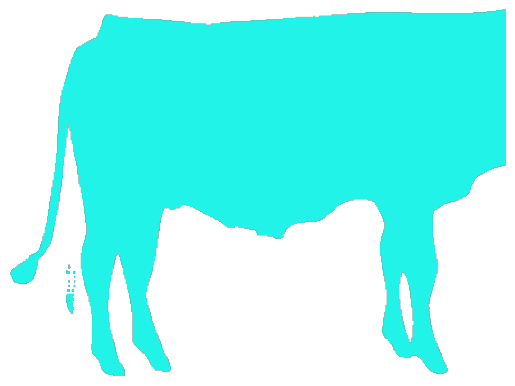

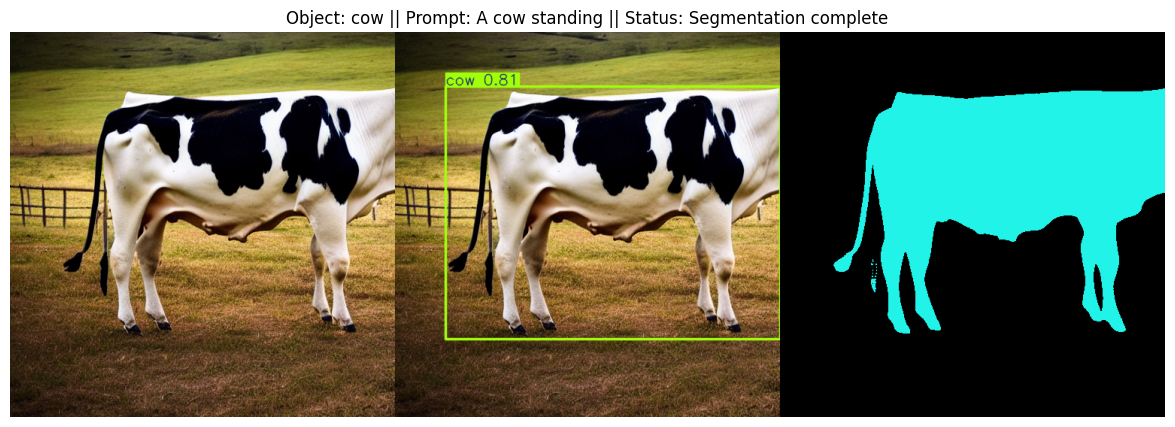

Target Object = damaged car

0: 640x640 1 car, 24.4ms
Speed: 5.5ms preprocess, 24.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Detected Objects: ['car']
Most relevant object to target object = car


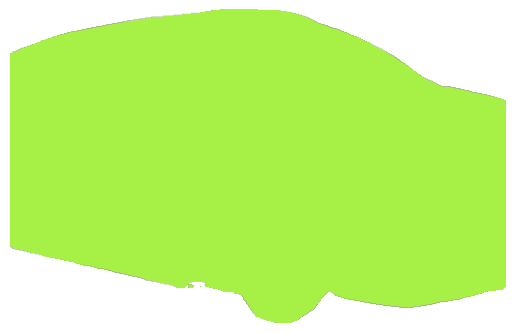

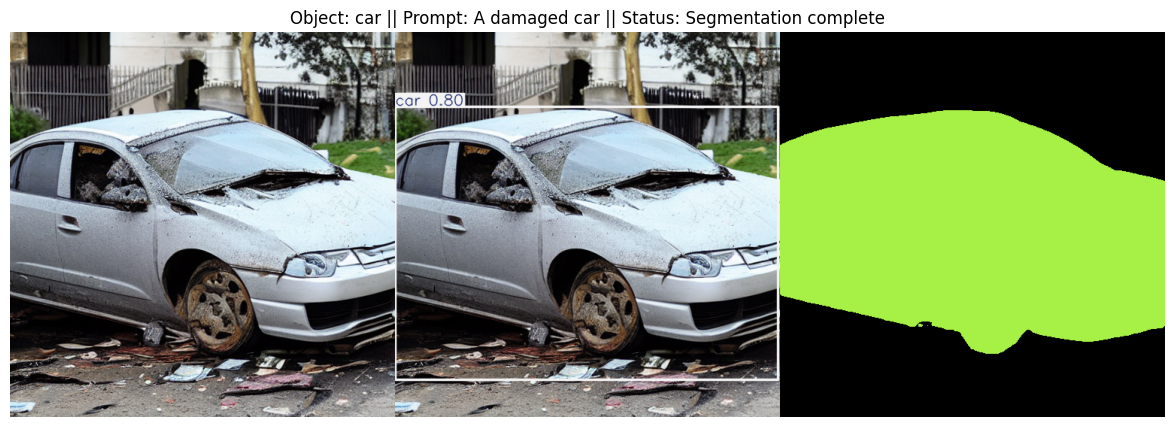

objects_array = ['cow', 'damaged car']
extracted_images = {'cow': <PIL.Image.Image image mode=RGBA size=441x326 at 0x7DDE6BED2EF0>, 'damaged car': <PIL.Image.Image image mode=RGBA size=512x324 at 0x7DDE814673A0>}


In [ ]:
objects_array = []
extracted_images = {}

# Iterate through images, target objects, and edited prompts
for image, target_object, edited_prompt in zip(images, target_object_array, edited_prompts_array):
    mask = segment_image(image, target_object, edited_prompt, recusive_diff_prompt)
    if mask is not None:
        extracted_images[target_object] = mask
        objects_array.append(target_object)

print("objects_array =", objects_array)
print("extracted_images =", extracted_images)

if not extracted_images:
    raise ValueError("No images were extracted. Please check the input data.")

# **Stacking Order Helper Functions**

In [ ]:
# Initialize the chessboard & Number Board
chessboard = []
number_board = []

# Define the columns and rows labels
columns = ''.join([chr(ord('a') + i) for i in range(gird_dim)])
rows = ''.join([str(gird_dim - i) for i in range(gird_dim)])

# Populate the chessboard with the corresponding positions
for (i,row) in enumerate(rows):
    chessboard_row = []
    number_row = []
    for (j,col) in enumerate(columns):
        chessboard_row.append(col + row)
        number_row.append(i * gird_dim + j + 1)
    chessboard.append(chessboard_row)
    number_board.append(number_row)

# Function to create a rectangle of given size at a random position
def create_rectangle(height, width=None):
    if width == None:
      width = height

    max_row = gird_dim - height
    max_col = gird_dim - width

    start_row = random.randint(0, max_row)
    start_col = random.randint(0, max_col)

    rectangle = []
    for i in range(start_row, start_row + height):
        row = []
        for j in range(start_col, start_col + width):
            row.append(chessboard[i][j])
        rectangle.append(row)

    return rectangle

# Function to convert a chessboard rectangle to a number board rectangle
def chessboard_to_numberboard(chessboard_rectangle):
    chessboard_rectangle = [chessboard_rectangle]
    numberboard_rectangle = []
    for row in chessboard_rectangle:
        numberboard_row = []
        for cell in row:
            for i in range(gird_dim):
                for j in range(gird_dim):
                    if chessboard[i][j] == cell:
                        numberboard_row.append(number_board[i][j])
        numberboard_rectangle.append(numberboard_row)
    return numberboard_rectangle[0]

#**Getting Stacking order for extracted segments from GPT 4o mini**

In [ ]:
def get_grid_positions_and_stack(prompt, objects_array):
    instruction = f"""
    You are an AI assistant that arranges objects in a {gird_dim}x{gird_dim} grid based on a prompt and a list of extracted objects.
    """

    prompt_content = f"""
    You are given a {gird_dim}x{gird_dim} grid with {gird_dim*gird_dim} boxes, similar to a chessboard. The grid has the following format:
    {chessboard}
    You are also provided with a prompt and a list of extracted objects. For each object, determine which box(es) it should occupy in the grid. If the object occupies multiple boxes, list all the boxes it occupies. Additionally, determine the stacking order of the objects, meaning which objects should appear on top of others.

    Consider the objects' relationship in the prompt and suggest the most visually appealing and logically correct arrangement. Ensure that objects with a natural horizontal or vertical orientation (e.g., a car) receive appropriate grid positions. For example:
    - Square objects like a box or a table should occupy positions like {create_rectangle(2)} or {create_rectangle(3)} but not diagonal or elongated positions.
    - Rectangular objects like a book or a door should occupy positions like {create_rectangle(3,2)} for horizontal orientation and {create_rectangle(2, 3)} for vertical orientation.
    - The relative size of the object. Smaller objects (e.g., a ball or a flower) will likely occupy a single box, while larger objects (e.g., a car or a tree) may occupy two or even three boxes.

    Here are a few examples:
    - If the object is a "table", it might occupy positions like {create_rectangle(3)}.
    - If the object is a "book", it might occupy positions like {create_rectangle(2, 3)} or {create_rectangle(1, 2)} depending on its orientation.

    Even though the background is not explicitly provided with the objects, keep the background context in mind when determining the objects' grid positions. This ensures that the overall scene is visually coherent.
    Make sure there is a list within a list just one grid position for each object and not a 2D list.
    This arrangement is intended for creating masks to be used in a Dense Diffusion model.

    Return the result in a valid JSON format as follows:
    {{
        "grid_positions": {{
            "Object Name 1": [list_of_boxes],
            "Object Name 2": [list_of_boxes]
        }},
        "stacking_order": ["Object Name 1", "Object Name 2"]
    }}
    Make sure the JSON is correctly formatted.

    Prompt: {prompt}
    Objects: {objects_array}
    """

    print("prompt_content =", prompt_content)

    gpt_4o_mini_response = gpt_4o_mini(prompt_content, instruction)

    # Remove triple backticks and any extra whitespace
    cleaned_response = gpt_4o_mini_response.strip("```").strip()

    # Check for prefix issues like "json\n{...}"
    if cleaned_response.startswith("json"):
        cleaned_response = cleaned_response[len("json"):].strip()

    # Remove any comments in the response
    cleaned_response = '\n'.join(line for line in cleaned_response.splitlines() if not line.strip().startswith("//"))

    try:
        gpt_4o_mini_response = json.loads(cleaned_response)
        grid_positions_by_gpt = gpt_4o_mini_response["grid_positions"]
        stacking_order_by_gpt = gpt_4o_mini_response["stacking_order"]
        print("---------------------------------------------")
        print("gpt_4o_mini_response =", gpt_4o_mini_response)
        print("---------------------------------------------")
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", str(e))
        grid_positions_by_gpt = None
        stacking_order_by_gpt = None

    return grid_positions_by_gpt, stacking_order_by_gpt

grid_positions_by_gpt, stacking_order = get_grid_positions_and_stack(recusive_diff_prompt, objects_array)
print("Grid Positions =", grid_positions_by_gpt)
print("Stacking Order =", stacking_order)

prompt_content = 
    You are given a 4x4 grid with 16 boxes, similar to a chessboard. The grid has the following format:
    [['a4', 'b4', 'c4', 'd4'], ['a3', 'b3', 'c3', 'd3'], ['a2', 'b2', 'c2', 'd2'], ['a1', 'b1', 'c1', 'd1']]
    You are also provided with a prompt and a list of extracted objects. For each object, determine which box(es) it should occupy in the grid. If the object occupies multiple boxes, list all the boxes it occupies. Additionally, determine the stacking order of the objects, meaning which objects should appear on top of others.

    Consider the objects' relationship in the prompt and suggest the most visually appealing and logically correct arrangement. Ensure that objects with a natural horizontal or vertical orientation (e.g., a car) receive appropriate grid positions. For example:
    - Square objects like a box or a table should occupy positions like [['b2', 'c2'], ['b1', 'c1']] or [['a3', 'b3', 'c3'], ['a2', 'b2', 'c2'], ['a1', 'b1', 'c1']] but not diagon

# **Converting Grid Position into Number Position**

In [ ]:
# converting grid_positions
grid_positions = {}
for obj in grid_positions_by_gpt:
  grid_positions[obj] = chessboard_to_numberboard(grid_positions_by_gpt[obj])

# Print the chessboard
print("Chessboard:")
for row in chessboard:
    print(row)

print("--------------")

# Print the number board
print("Number Board:")
for row in number_board:
    print(row)

print("--------------")

print("grid_positions_by_gpt =",grid_positions_by_gpt)
print("grid_positions =",grid_positions)

Chessboard:
['a4', 'b4', 'c4', 'd4']
['a3', 'b3', 'c3', 'd3']
['a2', 'b2', 'c2', 'd2']
['a1', 'b1', 'c1', 'd1']
--------------
Number Board:
[1, 2, 3, 4]
[5, 6, 7, 8]
[9, 10, 11, 12]
[13, 14, 15, 16]
--------------
grid_positions_by_gpt = {'cow': ['a1', 'a2', 'a3', 'a4'], 'damaged car': ['b1', 'b2', 'b3', 'c1', 'c2']}
grid_positions = {'cow': [13, 9, 5, 1], 'damaged car': [14, 10, 6, 15, 11]}


#**Making Composite Mask using stack order**

start_row = 1
end_row = 3
start_col = 1
end_col = 2
angle_deg = 56.309932474020215
start_row = 0
end_row = 3
start_col = 0
end_col = 0


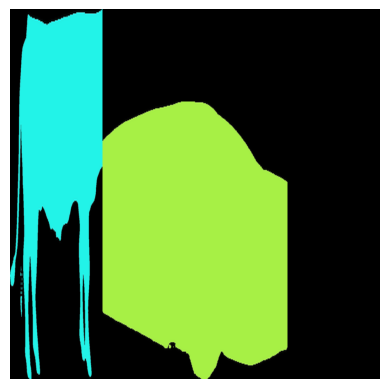

In [ ]:
# Define the canvas size and create a black canvas
pixel_dim_size = gird_dim*gird_dim * 100
canvas_size = (pixel_dim_size, pixel_dim_size)  # Example: 900x900 pixels, adjust as needed
canvas = Image.new("RGBA", canvas_size, (0, 0, 0, 255))  # Black canvas

# 1  2  3  4  5  6
# 7  8  9  10 11 12
# 13 14 15 16 17 18
# 19 20 21 22 23 24
# 25 26 27 28 29 30
# 31 32 33 34 35 36

# Define the grid size
grid_size = (gird_dim, gird_dim)  # gird_dim x gird_dim grid
cell_width = canvas_size[0] // grid_size[0]
cell_height = canvas_size[1] // grid_size[1]

def get_grid_coordinates(grid_positions):
    """Calculate top-left and bottom-right coordinates of the mask based on grid positions."""
    min_pos = min(grid_positions)
    max_pos = max(grid_positions)

    # Calculate top-left coordinates
    top_left_x = ((min_pos - 1) % grid_size[0]) * cell_width
    top_left_y = ((min_pos - 1) // grid_size[0]) * cell_height

    # Calculate bottom-right coordinates
    bottom_right_x = ((max_pos - 1) % grid_size[0] + 1) * cell_width
    bottom_right_y = ((max_pos - 1) // grid_size[0] + 1) * cell_height

    return top_left_x, top_left_y, bottom_right_x, bottom_right_y

def calculate_rotation_angle(grid_positions):
    """Calculate the rotation angle based on the grid positions."""
    min_pos = min(grid_positions)
    max_pos = max(grid_positions)

    start_row = (min_pos - 1) // grid_size[0]
    end_row = (max_pos - 1) // grid_size[0]
    start_col = (min_pos - 1) % grid_size[0]
    end_col = (max_pos - 1) % grid_size[0]
    print("start_row =",start_row)
    print("end_row =",end_row)
    print("start_col =",start_col)
    print("end_col =",end_col)

    # Calculate the height and width of the grid span
    height = abs((end_row - start_row + 1) * cell_height)
    width = abs((end_col - start_col + 1) * cell_width)

    # Check if the mask is purely vertical or horizontal
    if height == cell_height or width == cell_width:
        return 0  # No rotation for purely vertical or horizontal spans

    # Calculate the rotation angle in degrees
    angle_rad = atan2(height, width)
    angle_deg = degrees(angle_rad)
    print("angle_deg =",angle_deg)
    return angle_deg

# Iterate through the stacking order to overlay images
for obj in stacking_order:
    # Get the image and grid positions
    img = extracted_images[obj]
    positions = grid_positions[obj]

    # Calculate the grid coordinates
    top_left_x, top_left_y, bottom_right_x, bottom_right_y = get_grid_coordinates(positions)

    # Validate the calculated dimensions
    new_width = max(1, bottom_right_x - top_left_x)
    new_height = max(1, bottom_right_y - top_left_y)

    # Resize the image to fit within the calculated grid area
    resized_img = img.resize((new_width, new_height), Image.LANCZOS)

    # Calculate the rotation angle
    rotation_angle = calculate_rotation_angle(positions)
    ####################### SETTING IT TO 0 UNTIL WE FIX ROTATION !!!!!!!!!!!!!!!!!!!
    rotation_angle = 0

    # Rotate the image if needed
    if rotation_angle != 0:
        rotated_img = resized_img.rotate(rotation_angle, expand=True)
    else:
        rotated_img = resized_img

    # Calculate new top-left coordinates to center the rotated image in the grid area
    new_top_left_x = top_left_x + (new_width - rotated_img.width) // 2
    new_top_left_y = top_left_y + (new_height - rotated_img.height) // 2

    # Paste the rotated image onto the canvas at the calculated top-left position
    canvas.paste(rotated_img, (new_top_left_x, new_top_left_y), rotated_img)

# Convert the canvas to a format that can be displayed using matplotlib
canvas_np = np.array(canvas)

# Display the result using matplotlib
plt.imshow(canvas_np)
plt.axis('off')  # Hide axes
plt.show()

# Convert the NumPy array back to a PIL Image
canvas_pil = Image.fromarray(canvas_np)

# **Dense Diffusion**

# **Modified** Forward Function for **Attention Mechanism** with Regularization

In [ ]:
def mod_forward(self, hidden_states, encoder_hidden_states=None, attention_mask=None, temb=None):
    # Save the input states as residual for later residual connection
    residual = hidden_states

    # Apply spatial normalization if available
    if self.spatial_norm is not None:
        hidden_states = self.spatial_norm(hidden_states, temb)

    input_ndim = hidden_states.ndim

    # Reshape the hidden states if they are 4-dimensional (e.g., images)
    if input_ndim == 4:
        batch_size, channel, height, width = hidden_states.shape
        hidden_states = hidden_states.view(batch_size, channel, height * width).transpose(1, 2)

    # Prepare attention mask
    batch_size, sequence_length, _ = (hidden_states.shape if encoder_hidden_states is None else encoder_hidden_states.shape)
    attention_mask = self.prepare_attention_mask(attention_mask, sequence_length, batch_size)

    # Apply group normalization if available
    if self.group_norm is not None:
        hidden_states = self.group_norm(hidden_states.transpose(1, 2)).transpose(1, 2)


    # Prepare query, key, and value tensors for attention
    query = self.to_q(hidden_states)

    sa_ = True if encoder_hidden_states is None else False
    encoder_hidden_states = text_cond if encoder_hidden_states is not None else hidden_states
    if self.norm_cross:
        encoder_hidden_states = self.norm_encoder_hidden_states(encoder_hidden_states)

    key = self.to_k(encoder_hidden_states)
    value = self.to_v(encoder_hidden_states)


    # Reshape tensors for multi-head attention
    query = self.head_to_batch_dim(query)
    key = self.head_to_batch_dim(key)
    value = self.head_to_batch_dim(value)

    #################################################
    global COUNT

    # Apply regularization if certain condition is met
    if COUNT/32 < 50*reg_part:

        dtype = query.dtype
        if self.upcast_attention:
            query = query.float()
            key = key.float()

        # Compute similarity scores
        sim = torch.baddbmm(torch.empty(query.shape[0], query.shape[1], key.shape[1],
                                        dtype=query.dtype, device=query.device),
                            query, key.transpose(-1, -2), beta=0, alpha=self.scale)

        treg = torch.pow(timesteps[COUNT//32]/1000, 5)

        ## reg at self-attn
        # Apply spatial regularization for self-attention
        if sa_:
            min_value = sim[int(sim.size(0)/2):].min(-1)[0].unsqueeze(-1)
            max_value = sim[int(sim.size(0)/2):].max(-1)[0].unsqueeze(-1)
            mask = sreg_maps[sim.size(1)].repeat(self.heads,1,1)
            size_reg = reg_sizes[sim.size(1)].repeat(self.heads,1,1)

            sim[int(sim.size(0)/2):] += (mask>0)*size_reg*sreg*treg*(max_value-sim[int(sim.size(0)/2):])
            sim[int(sim.size(0)/2):] -= ~(mask>0)*size_reg*sreg*treg*(sim[int(sim.size(0)/2):]-min_value)


        ## reg at cross-attn
        # Apply cross-attention regularization
        else:
            min_value = sim[int(sim.size(0)/2):].min(-1)[0].unsqueeze(-1)
            max_value = sim[int(sim.size(0)/2):].max(-1)[0].unsqueeze(-1)
            mask = creg_maps[sim.size(1)].repeat(self.heads,1,1)
            size_reg = reg_sizes[sim.size(1)].repeat(self.heads,1,1)

            sim[int(sim.size(0)/2):] += (mask>0)*size_reg*creg*treg*(max_value-sim[int(sim.size(0)/2):])
            sim[int(sim.size(0)/2):] -= ~(mask>0)*size_reg*creg*treg*(sim[int(sim.size(0)/2):]-min_value)

        # Compute attention probabilities
        attention_probs = sim.softmax(dim=-1)
        attention_probs = attention_probs.to(dtype)

    else:
        # Default attention score computation
        attention_probs = self.get_attention_scores(query, key, attention_mask)

    COUNT += 1
    #################################################


    # Compute new hidden states based on attention probabilities and value tensor
    hidden_states = torch.bmm(attention_probs, value)
    hidden_states = self.batch_to_head_dim(hidden_states)


    # linear proj
    hidden_states = self.to_out[0](hidden_states)
    # dropout
    hidden_states = self.to_out[1](hidden_states)

    # Reshape hidden states if they were 4-dimensional
    if input_ndim == 4:
        hidden_states = hidden_states.transpose(-1, -2).reshape(batch_size, channel, height, width)

    # Add residual connection
    if self.residual_connection:
        hidden_states = hidden_states + residual

    hidden_states = hidden_states / self.rescale_output_factor

    return hidden_states

# **Override UNet Attention Mechanism** with Custom Forward Function

In [ ]:
# Override UNet Attention Mechanism with Custom Forward Function
for _module in pipe.unet.modules():
    if _module.__class__.__name__ == "Attention":
        _module.__class__.__call__ = mod_forward

# **Generating Dense Diffusion Prompt**

In [ ]:
dense_diffusion_prompt = [recusive_diff_prompt, ""] + [obj.lower() for obj in stacking_order]

print("dense_diffusion_prompt =", dense_diffusion_prompt)

dense_diffusion_prompt = ['Ten cows standing next to a many damaged blue cars on a dirty lot.', '', 'damaged car', 'cow']


# **Tokenizing Prompts, Processing Layout Image**


text_input = {'input_ids': tensor([[49406,  2581, 15204,  2862,  1131,   531,   320,  1346, 13568,  1746,  3346,   525,   320,  7615,  1954,   269, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407],
        [49406, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407

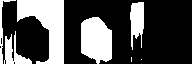

In [ ]:
# Tokenize the dense_diffusion_prompt
text_input = pipe.tokenizer(dense_diffusion_prompt, padding="max_length", return_length=True, return_overflowing_tokens=False,
                            max_length=pipe.tokenizer.model_max_length, truncation=True, return_tensors="pt")
print("text_input =",text_input)
cond_embeddings = pipe.text_encoder(text_input.input_ids.to(device))[0]
print("cond_embeddings =",cond_embeddings)

# Tokenize for unconditional inputs
uncond_input = pipe.tokenizer([""] * bsz, padding="max_length", max_length=pipe.tokenizer.model_max_length,
                              truncation=True, return_tensors="pt")
print("uncond_input =",uncond_input)
uncond_embeddings = pipe.text_encoder(uncond_input.input_ids.to(device))[0]
print("uncond_embeddings =",uncond_embeddings)

# Ensure that wlen matches the length of widx
for i in range(1, len(dense_diffusion_prompt)):
    wlen = text_input['length'][i].item() - 2  # Convert tensor to int
    widx = text_input['input_ids'][i][1:1 + wlen]
    print("before wlen =",wlen)
    print("before widx =",widx)
    for j in range(77):
        if j + wlen <= 77 and (text_input['input_ids'][0][j:j + wlen] == widx).sum().item() == wlen:  # Use .item() to get the value
            break
    print("after wlen =",wlen)
    print("after widx =",widx)

# Process the layout image
layout_img_ = np.asarray(canvas_pil.resize([sp_sz * 8, sp_sz * 8]))[:, :, :3]
unique, counts = np.unique(np.reshape(layout_img_, (-1, 3)), axis=0, return_counts=True)
sorted_idx = np.argsort(-counts)

layouts_ = []

for i in range(len(dense_diffusion_prompt) - 1):
    if (unique[sorted_idx[i]] == [0, 0, 0]).all() or (unique[sorted_idx[i]] == [255, 255, 255]).all():
        layouts_ = [((layout_img_ == unique[sorted_idx[i]]).sum(-1) == 3).astype(np.uint8)] + layouts_
    else:
        layouts_.append(((layout_img_ == unique[sorted_idx[i]]).sum(-1) == 3).astype(np.uint8))

layouts = [torch.FloatTensor(l).unsqueeze(0).unsqueeze(0).cuda() for l in layouts_]
layouts = F.interpolate(torch.cat(layouts), (sp_sz, sp_sz), mode='nearest')

print('\n'.join(dense_diffusion_prompt))
Image.fromarray(np.concatenate([255 * _.squeeze().cpu().numpy() for _ in layouts], 1).astype(np.uint8))

# **Preparation for Spatial Regularization (sreg) and Cross-Attention Regularization (creg)**

In [ ]:
###########################
###### prep for sreg ######
###########################
sreg_maps = {}
reg_sizes = {}
for r in range(4):
    res = int(sp_sz/np.power(2,r))
    layouts_s = F.interpolate(layouts,(res, res),mode='nearest')
    layouts_s = (layouts_s.view(layouts_s.size(0),1,-1)*layouts_s.view(layouts_s.size(0),-1,1)).sum(0).unsqueeze(0).repeat(bsz,1,1)
    reg_sizes[np.power(res, 2)] = 1-1.*layouts_s.sum(-1, keepdim=True)/(np.power(res, 2))
    sreg_maps[np.power(res, 2)] = layouts_s


###########################
###### prep for creg ######
###########################
pww_maps = torch.zeros(1, 77, sp_sz, sp_sz).to(device)
for i in range(1,len(dense_diffusion_prompt)):
    wlen = text_input['length'][i] - 2
    widx = text_input['input_ids'][i][1:1+wlen]
    for j in range(77):
        if j + wlen <= 77 and (text_input['input_ids'][0][j:j + wlen].shape == widx.shape and (text_input['input_ids'][0][j:j + wlen] == widx).sum().item() == wlen):
            pww_maps[:,j:j+wlen,:,:] = layouts[i-1:i]
            cond_embeddings[0][j:j+wlen] = cond_embeddings[i][1:1+wlen]
            print(dense_diffusion_prompt[i], i, '-th segment is handled.')
            break

creg_maps = {}
for r in range(4):
    res = int(sp_sz/np.power(2,r))
    layout_c = F.interpolate(pww_maps,(res,res),mode='nearest').view(1,77,-1).permute(0,2,1).repeat(bsz,1,1)
    creg_maps[np.power(res, 2)] = layout_c


###########################
#### prep for text_emb ####
###########################
text_cond = torch.cat([uncond_embeddings, cond_embeddings[:1].repeat(bsz,1,1)])

 1 -th segment is handled.


# **Latent Generation and Image Synthesis**

In [ ]:
reg_part = .3
sreg = .3
creg = 1.

COUNT = 0

with torch.no_grad():
    latents = torch.randn(bsz,4,sp_sz,sp_sz, generator=torch.Generator().manual_seed(1)).to(device)
    image = pipe(dense_diffusion_prompt[:1]*bsz, latents=latents).images

  0%|          | 0/50 [00:00<?, ?it/s]

# **Recursive Diffusion using Dense Diffusion Image**

recursive_diff_prompt = Ten cows standing next to a many damaged blue cars on a dirty lot.


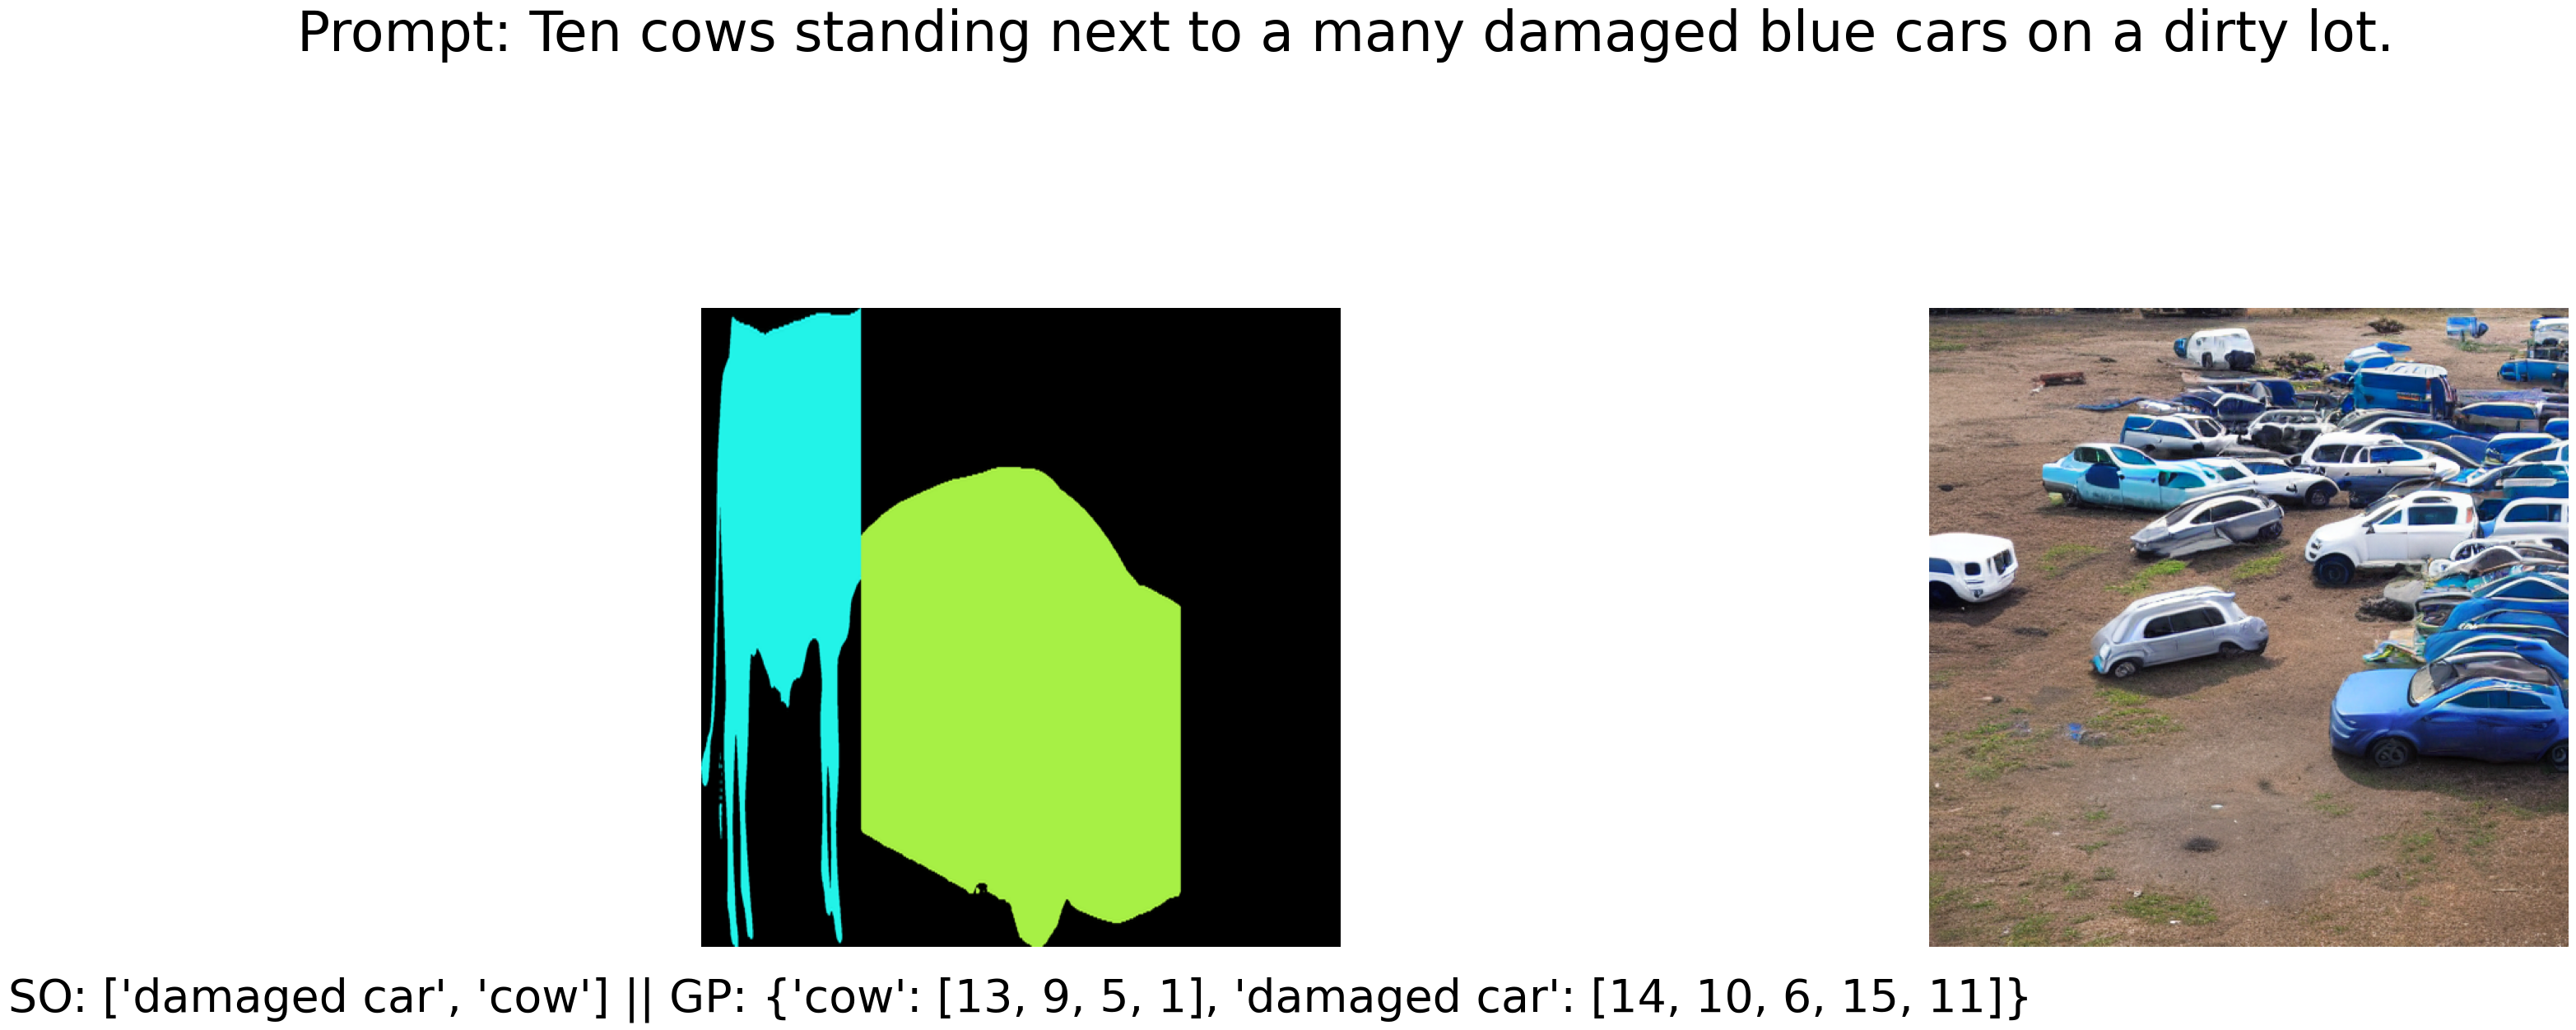

In [ ]:
print("recursive_diff_prompt =", recusive_diff_prompt)
display_prompt = ' '.join(recusive_diff_prompt.split()[:15])

# Adjust the figsize for larger images
fig, axes = plt.subplots(1, len(image) + 1, figsize=(30, 15))

# Display the layout image with the stacking order title below the image
axes[0].imshow(layout_img_)
axes[0].axis('off')
axes[0].text(0.5, -0.1, f"SO: {str(stacking_order)} || GP: {grid_positions}", fontsize=40, ha='center', transform=axes[0].transAxes)

# Display each image with the corresponding title below the images
for i in range(len(image)):
    axes[i + 1].imshow(image[i])
    axes[i + 1].axis('off')
    # axes[i + 1].text(0.5, -0.1, f"Recursive Diffusion Image", fontsize=40, ha='center', transform=axes[i + 1].transAxes)

# Set the combined title for the figure
fig.suptitle(f"Prompt: {display_prompt}", fontsize=48)

# Adjust layout and display the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top to accommodate the suptitle
plt.show()

# **Simple Stable Diffusion Image**

Prompt = Ten cows standing next to a many damaged blue cars on a dirty lot.


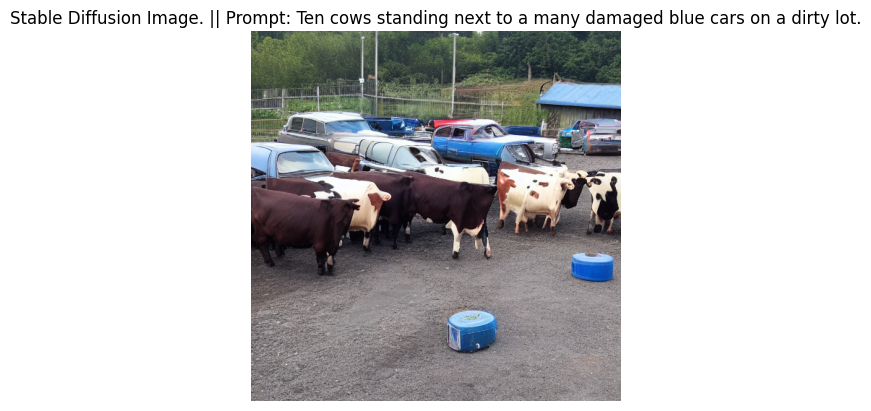

In [ ]:
print("Prompt =",recusive_diff_prompt)
plt.imshow(stable_diffusion_image)
plt.axis('off')
display_text = 'Stable Diffusion Image. || Prompt: ' + display_prompt
plt.title(display_text)
plt.show()

In [ ]:
print_time_taken(start_time,time.time(),"complete code")

Time taken for complete code: 4 minutes and 32 seconds
